In [41]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time
from XY_diagonalisation import Plot_XY_Computations as XY_model_plotting
from functools import partial
from mpl_toolkits import mplot3d

In [47]:
XY_model.N_size=50001
XY_model.Gamma=0.3
XY_model.Lambda=0.6
with Pool(3) as p:
    Fourier_ground=partial(XY_model.Simple_Fourier_Transform ,Ground=True) # prod_x has only one argument x (y is fixed to 10)
    Data =np.array(p.map(Fourier_ground,range(10)))

In [56]:
%matplotlib notebook

<IPython.core.display.Javascript object>


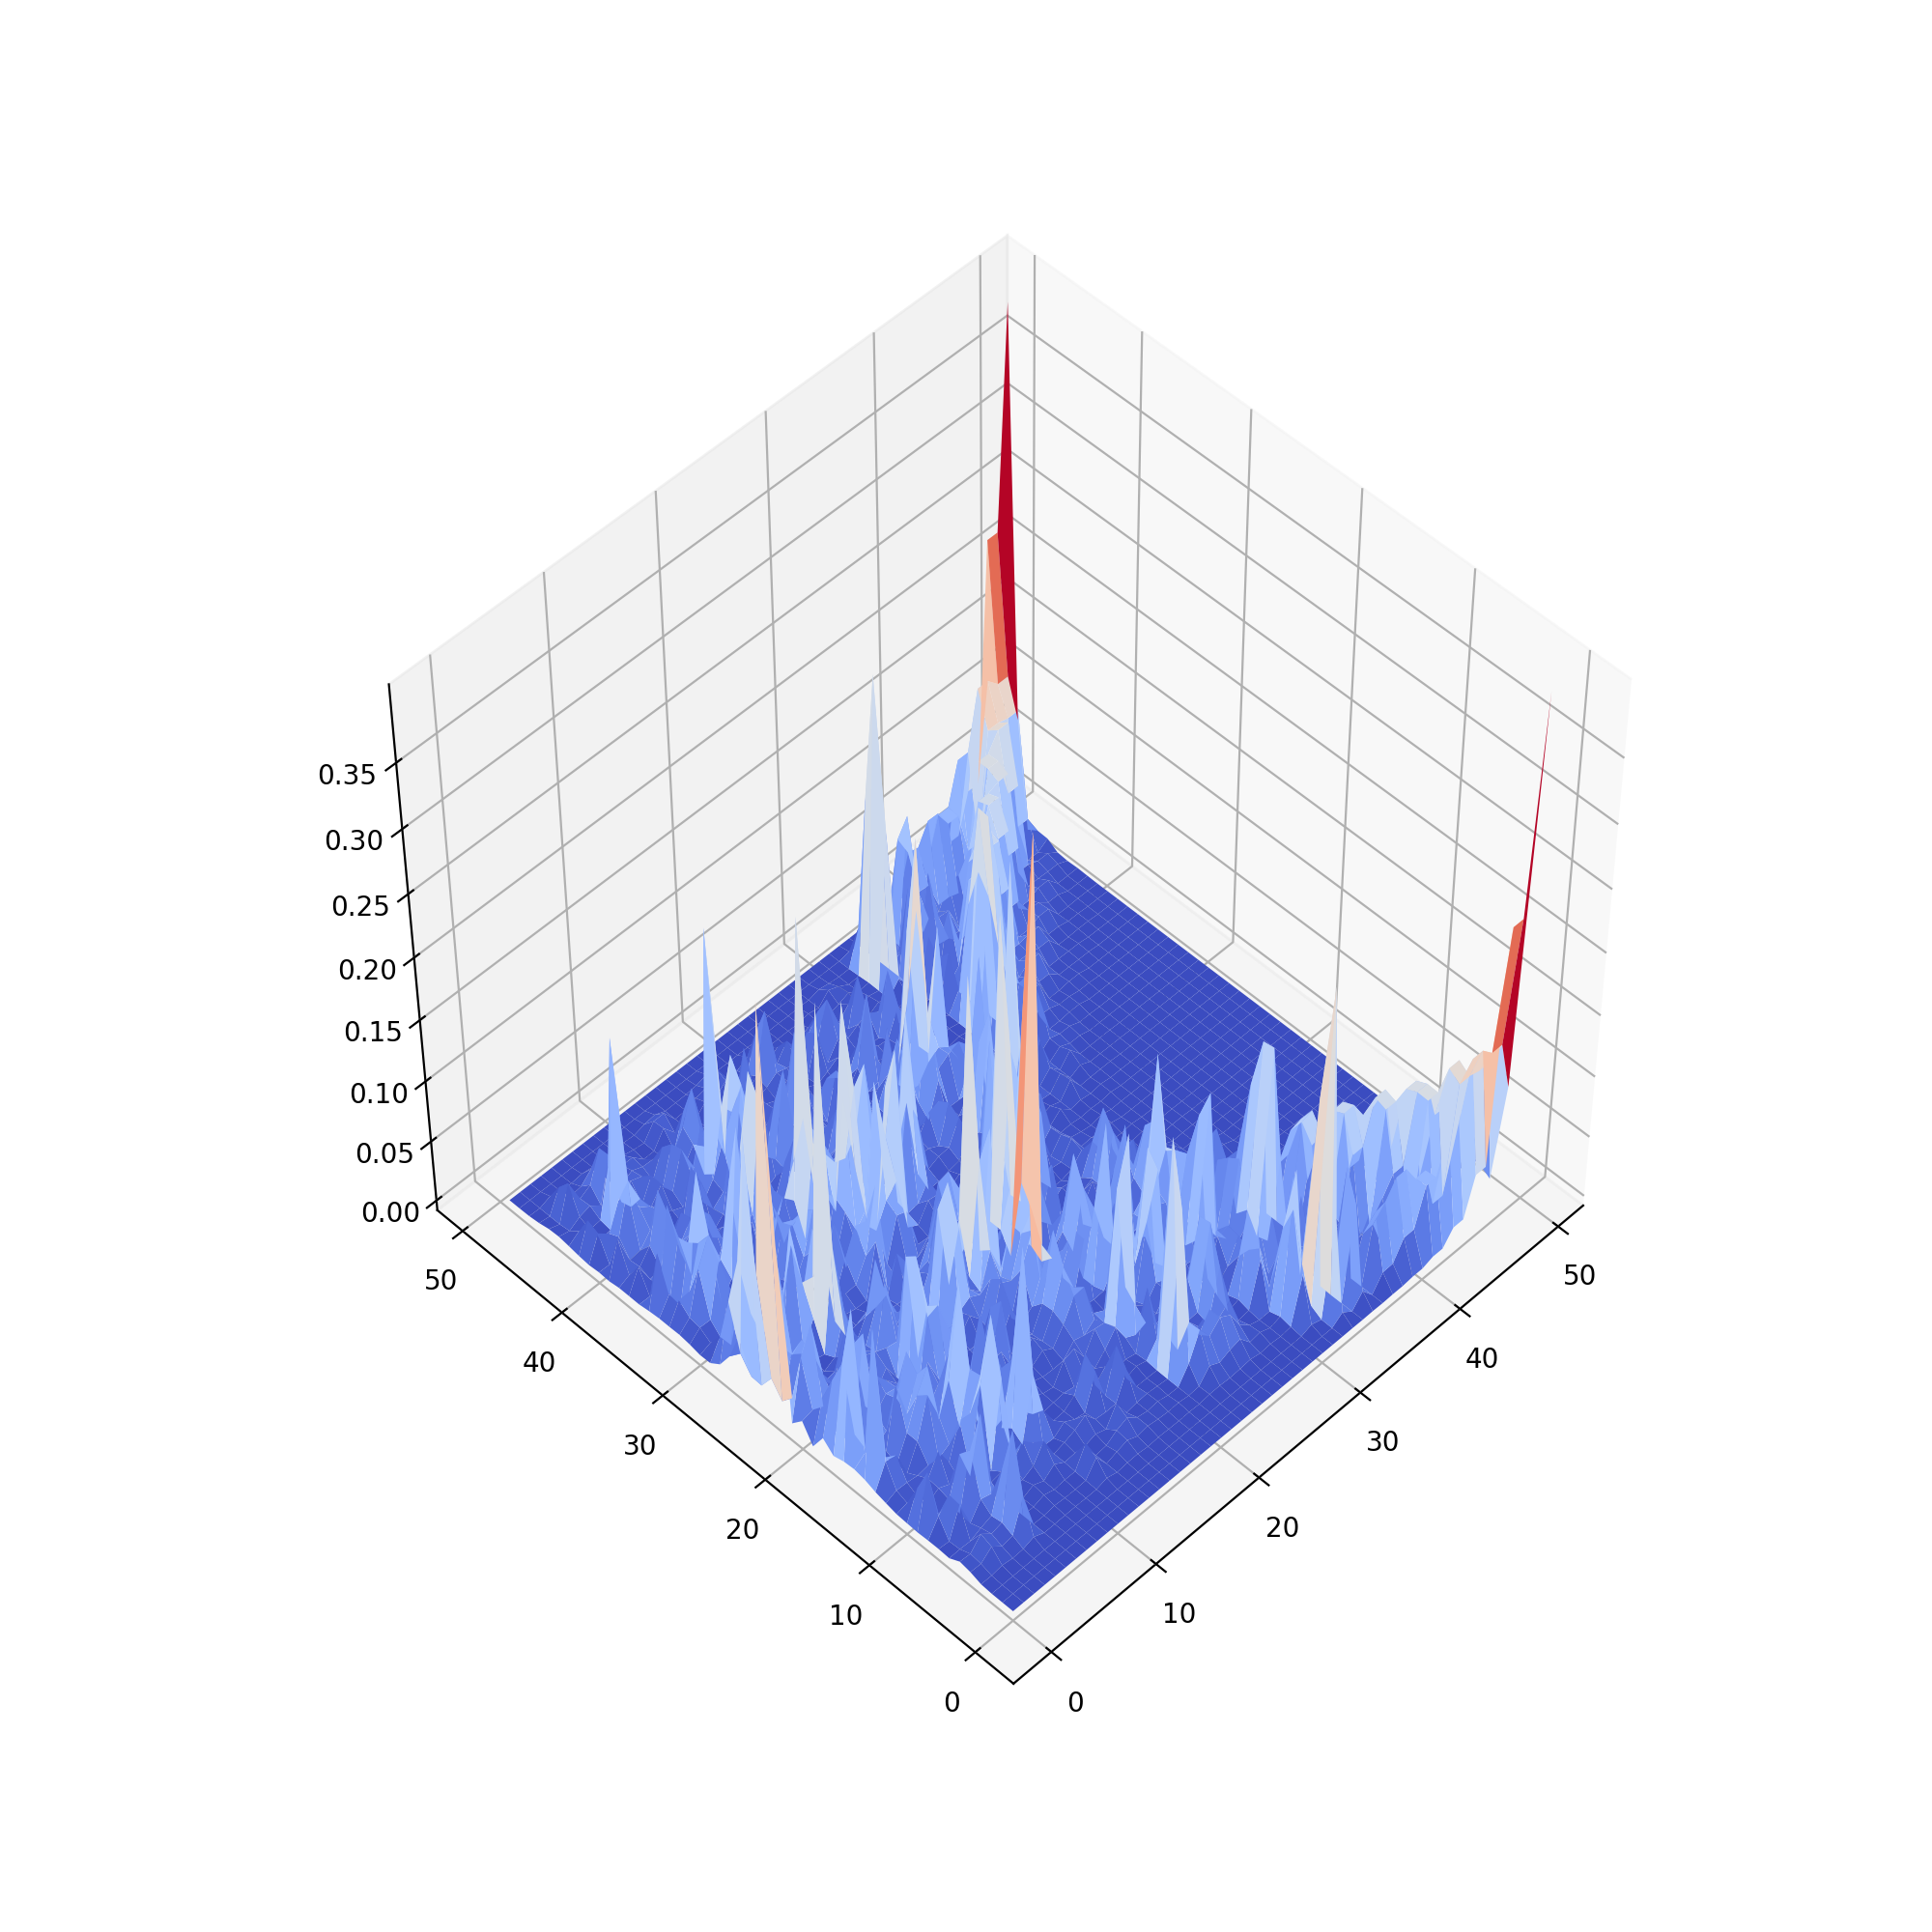

In [57]:
L=50
P=XY_model.Compute_Participation_Function(Fourier_M=None, Fourier_P=Data[0,:,1],L=L)

x=np.arange(0,L)
y=np.arange(0,L)
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
ax.view_init(elev=25., azim=i)
#plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
#plt.close()
plt.show()


In [ ]:
P=XY_model.Compute_Participation_Function

# Test for Covariance matrix from sub sample
## T+H

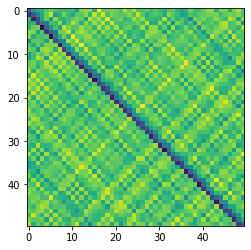

In [3]:
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=Data[:,:,0].mean(axis=0),Fourier_plus=Data[:,:,1].mean(axis=0),L=50,Circulant=False))


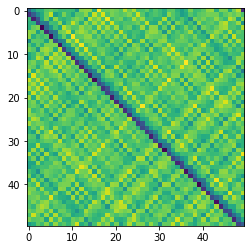

In [4]:
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=Data[:,:,0].mean(axis=0),Fourier_plus=Data[:,:,1].mean(axis=0),L=50,Circulant=True))

# Test T

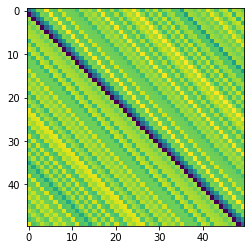

In [5]:
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=None,Fourier_plus=Data[:,:,1].mean(axis=0),L=50,Circulant=False))

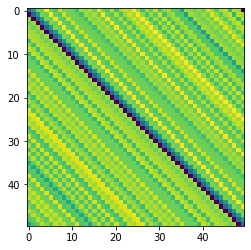

In [6]:
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=None,Fourier_plus=Data[:,:,1].mean(axis=0),L=50,Circulant=True))

# Entropy

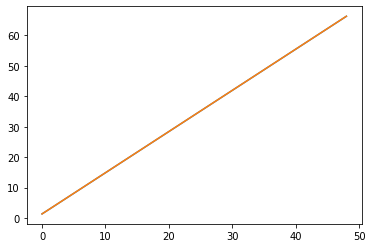

In [43]:
plt.plot(XY_model.Compute_Entropy_State(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),Circulant=True))
plt.plot(XY_model.Compute_Entropy_State(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),Circulant=False))

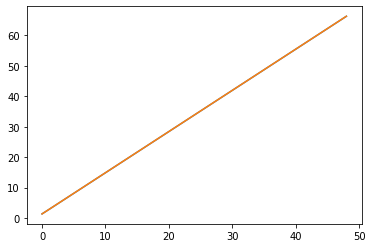

In [44]:
plt.plot(XY_model.Compute_Entropy_State(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),Circulant=True))
plt.plot(XY_model.Compute_Entropy_State(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),Circulant=False))

# Ground State

In [45]:
XY_model.N_size=50001
with Pool(3) as p:
    Fourier_ground=partial(XY_model.Simple_Fourier_Transform ,Ground=True) # prod_x has only one argument x (y is fixed to 10)
    Data =np.array(p.map(Fourier_ground,range(10)))

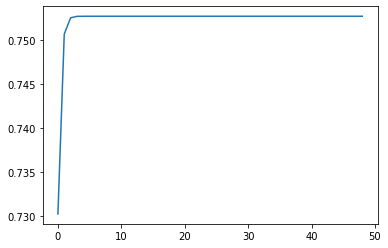

In [10]:
plt.plot(XY_model.Compute_Entropy_State(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),Circulant=False))

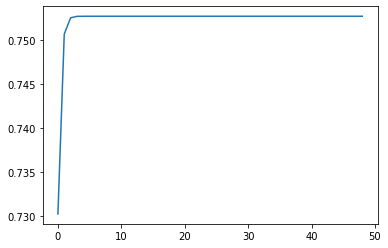

In [11]:
plt.plot(XY_model.Compute_Entropy_State(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),Circulant=False))

# Density matrix
## T+H

In [12]:
XY_model.N_size=50001
with Pool(3) as p:
    Fourier_ground=partial(XY_model.Simple_Fourier_Transform ,Ground=False) # prod_x has only one argument x (y is fixed to 10)
    Data =np.array(p.map(Fourier_ground,range(10)))

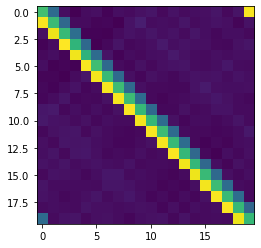

In [13]:
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=True))

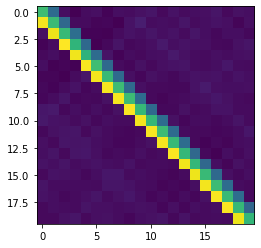

In [14]:
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=False))

# T

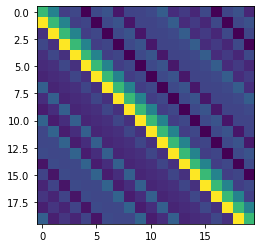

In [39]:
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=False))

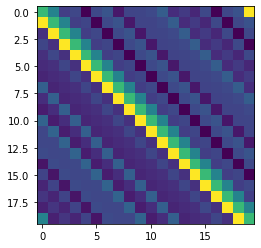

In [40]:
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=True))

# Participation Function
## T+ H


In [17]:
P=XY_model.Compute_Participation_Function(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=False)

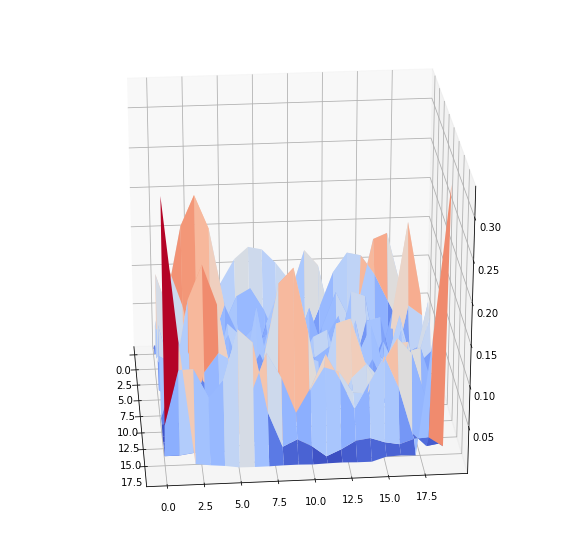

In [18]:
x=np.arange(0,20)
y=np.arange(0,20)
X,Y = np.meshgrid(x,y)
for i in range(0,360,5):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
    ax.view_init(elev=25., azim=i)
    #plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
    #plt.close()
    plt.show()
    clear_output(wait=True)

In [19]:
P=XY_model.Compute_Participation_Function(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=True)

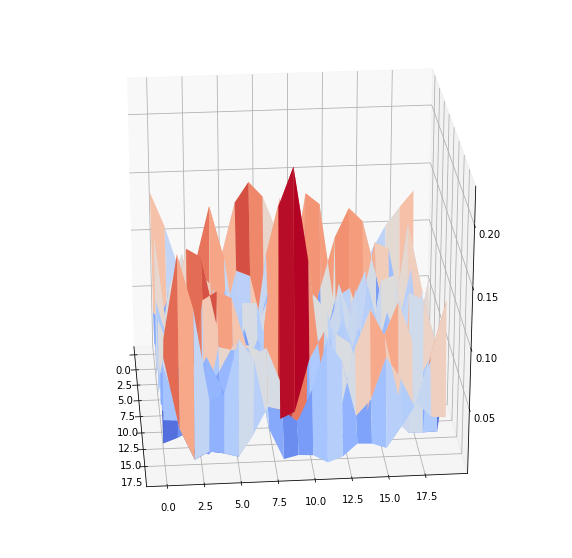

In [20]:
x=np.arange(0,20)
y=np.arange(0,20)
X,Y = np.meshgrid(x,y)
for i in range(0,360,5):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
    ax.view_init(elev=25., azim=i)
    #plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
    #plt.close()
    plt.show()
    clear_output(wait=True)

# T

In [21]:
P=XY_model.Compute_Participation_Function(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=True)

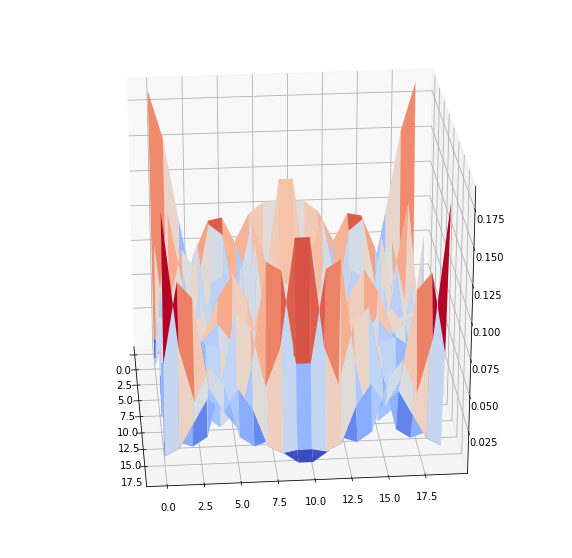

In [22]:
x=np.arange(0,20)
y=np.arange(0,20)
X,Y = np.meshgrid(x,y)
for i in range(0,360,5):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
    ax.view_init(elev=25., azim=i)
    #plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
    #plt.close()
    plt.show()
    clear_output(wait=True)

In [23]:
P=XY_model.Compute_Participation_Function(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=False)

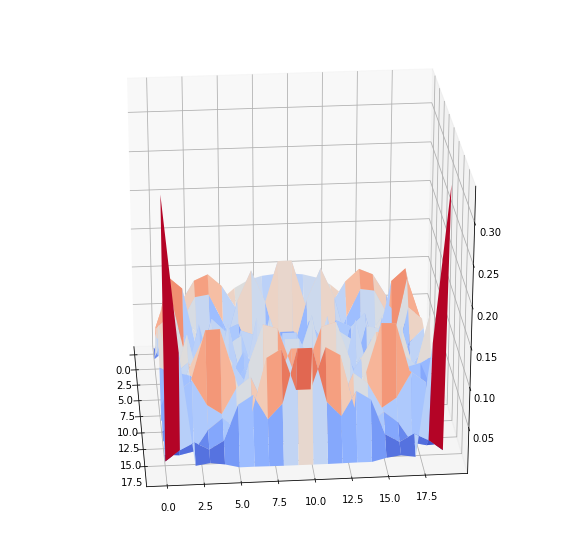

In [24]:
x=np.arange(0,20)
y=np.arange(0,20)
X,Y = np.meshgrid(x,y)
for i in range(0,360,5):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
    ax.view_init(elev=25., azim=i)
    #plt.savefig("Participation_{}.png".format(str(i).zfill(3)))
    #plt.close()
    plt.show()
    clear_output(wait=True)

# Compute Spectrum
## T+H

In [25]:
S,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=False)

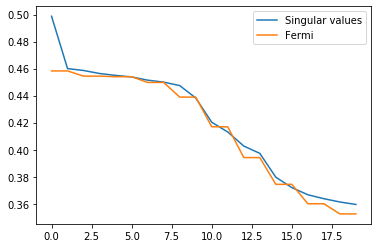

In [26]:
plt.plot(S,label="Singular values")
plt.plot(fermi,label= "Fermi")
plt.legend()

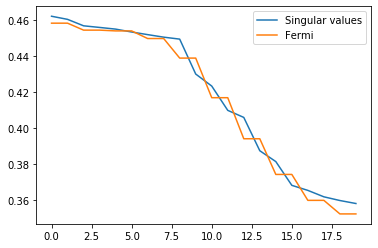

In [27]:
S,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=Data[:,:,0].mean(axis=0),Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=True)
plt.plot(S,label="Singular values")
plt.plot(fermi,label= "Fermi")
plt.legend()

# T

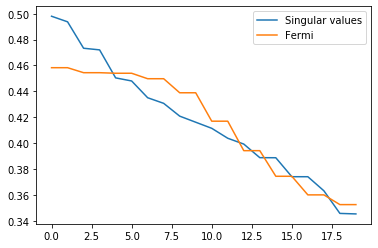

In [38]:
S,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=True)
plt.plot(S,label="Singular values")
plt.plot(fermi,label= "Fermi")
plt.legend()

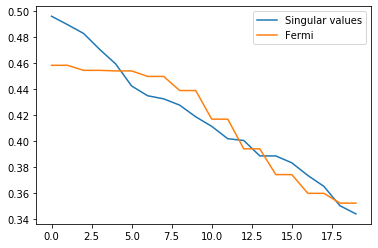

In [37]:
S,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=20,Circulant=False)
plt.plot(S,label="Singular values")
plt.plot(fermi,label= "Fermi")
plt.legend()

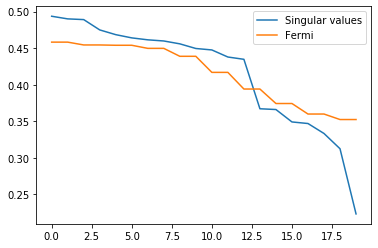

In [36]:
S,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=None,Fourier_P=Data[0,:,1],L=20,Circulant=False)
plt.plot(S,label="Singular values")
plt.plot(fermi,label= "Fermi")
plt.legend()

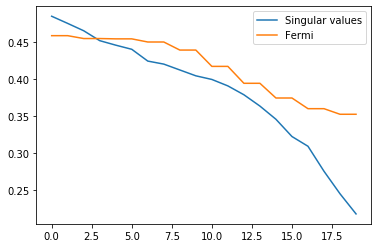

In [35]:
S,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=20,Circulant=False)
plt.plot(S,label="Singular values")
plt.plot(fermi,label= "Fermi")
plt.legend()

M